In [2]:
import codecs
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
#nomFlexiqueVerbes="/Users/gilles/Github/flexique/data/vlexique.csv"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t")
#vlexique=pd.read_csv(nomFlexiqueVerbes,sep=",",header=None)

In [4]:
Lexique3.columns#, vlexique.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

In [5]:
#vlexique

In [6]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","9_freqfilms2","10_freqlivres","11_infover"]]

In [73]:
lex3[lex3["1_ortho"]=="sélections"]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,9_freqfilms2,10_freqlivres,11_infover,infover
126414,sélections,selEksj§,sélection,NOM,f,p,0.24,0.27,NaN,NaN
126415,sélections,selEktj§,sélecter,VER,NaN,NaN,0.01,0.00,ind:imp:1p;,ind:imp:1p;


In [5]:
flemme=lex3[lex3["4_cgram"]=="VER"].groupby(by="3_lemme")[["11_infover"]].sum()

In [6]:
flemme["11_infover"].str.split(";").apply(set).str.len().sort_values()[-20:]

3_lemme
sentir       43
partir       43
mettre       43
dire         43
chercher     43
prendre      43
connaître    44
trouver      44
croire       44
vouloir      44
donner       44
pouvoir      44
passer       44
parler       44
savoir       45
devoir       46
aimer        46
faire        48
avoir        48
être         49
Name: 11_infover, dtype: int64

In [7]:
print len(flemme[flemme.index=="essayer"]["11_infover"].str.split(";").apply(set).values[0])

38


In [8]:
def infoVer(row):
    genreNombre=""
    if isinstance(row["11_infover"],str):
        if isinstance(row["5_genre"],str):
            genreNombre+=row["5_genre"]
        if isinstance(row["6_nombre"],str):
            genreNombre+=row["6_nombre"]        
        return row["11_infover"].replace("par:pas","par:pas:"+genreNombre)
    else:
        return row["11_infover"]

In [9]:
lex3.loc[:,"infover"]=lex3.apply(lambda x: infoVer(x),axis=1)

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["11_infover"].str.contains("par:pas")) & (lex3["3_lemme"]=="mettre")]

In [29]:
flemme=lex3[lex3["4_cgram"]=="VER"].groupby(by="3_lemme")[["infover"]].sum()
flemme["nbSet"]=flemme["infover"].str.split(";").apply(set).str.len()-1

In [55]:
flemme.sort_values("nbSet")

infover    ind:pas:3s;ind:pas:1s;ind:imp:3p;ind:imp:3s;pa...
nbSet                                                  76348
dtype: object

In [43]:
flemme[(flemme["nbSet"]==1)].groupby(by="infover").count().sort_values("nbSet")

,nbSet
infover,
sub:pre:3s;,1
sub:imp:3s;,1
sub:imp:1s;,1
inf;;,1
sub:pre:2s;,1
ind:pre:1p;,1
inf;inf;,2
ind:imp:1p;,2
ind:pas:2s;,2


In [70]:
flemme[(flemme["infover"].str.contains("(ind:imp|sub:pre):(1|2)p")) & (flemme["nbSet"]==1)]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
impulser,ind:imp:1p;,1
sélecter,ind:imp:1p;,1


In [54]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
abouter,ind:imp:3s;imp:pre:1p;,2
aboutonner,ind:pas:1s;,1
abricoter,imp:pre:2p;,1
accalmir,ind:pas:3s;,1
acter,ind:pas:3s;ind:imp:1p;sub:pre:1p;,3
adire,ind:fut:3s;,1
agneler,ind:pas:3s;,1
aguiller,ind:fut:3s;,1
alper,ind:pas:3s;,1


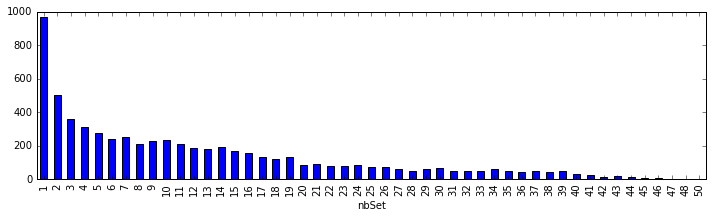

In [67]:
flemme.groupby(by="nbSet")["nbSet"].count().plot(kind="bar",figsize=(12,3))

In [12]:
%matplotlib inline

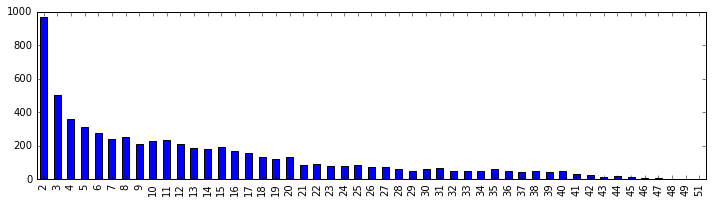

In [61]:
distFlemme.value_counts(sort=False).sort_index().plot(kind="bar",figsize=(12,3))

In [ ]:
print len(flemme[flemme.index=="distraire"]["infover"].str.split(";").apply(set).values[0])

In [ ]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["3_lemme"]=="distraire")]

In [ ]:
Lexique3[(Lexique3["4_cgram"]=="VER") & (Lexique3["3_lemme"]=="manger")]

# Comparer les fréquences de Lexique3 avec Zipf
- découper les syncrétismes en cases
- chercher la distribution de fréquences pour les syncrétismes
- tracer la courbe de fréquence pour les verbes

In [8]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["9_freqfilms2"]!=0)]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,9_freqfilms2,10_freqlivres,11_infover
2,a,a,avoir,VER,NaN,NaN,5498.34,1669.39,ind:pre:3s;
19,abaissai,abEsE,abaisser,VER,NaN,NaN,0.10,0.07,ind:pas:1s;
21,abaissait,abEsE,abaisser,VER,NaN,NaN,0.02,2.50,ind:imp:3s;
23,abaissant,abEs@,abaisser,VER,NaN,NaN,0.01,2.50,par:pre;
26,abaisse,abEs,abaisser,VER,NaN,NaN,1.28,3.45,imp:pre:2s;ind:pre:1s;ind:pre:3s;
29,abaissent,abEs,abaisser,VER,NaN,NaN,0.05,0.95,ind:pre:3p;
30,abaisser,abese,abaisser,VER,NaN,NaN,1.09,2.91,inf;
31,abaissera,abEs°Ra,abaisser,VER,NaN,NaN,0.19,0.07,ind:fut:3s;
32,abaisserai,abEs°RE,abaisser,VER,NaN,NaN,0.10,0.07,ind:fut:1s;
33,abaisseraient,abEs°RE,abaisser,VER,NaN,NaN,0.01,0.07,cnd:pre:3p;


In [11]:
pd.DataFrame([[1,2,3,0,0],[0,0,3,3,0],[1,0,0,0,5]])

,0,1,2,3,4
0,1,2,3,0,0
1,0,0,3,3,0
2,1,0,0,0,5
